# Clayton Seabaugh: Predicting a Continuous Target with Regression
**Author:** Clayton Seabaugh  
**Date:** 4-6-2025  
**Objective:** Predict a continuous numeric target using a regression model. 

## Imports:

In [73]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score


## Section 1: Import and Inspect the Data
Load the Titanic dataset and confirm it's structured correctly. 

In [74]:
# Load Titanic dataset from seaborn and verify
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Section 2: Data Exploration and Preparation
Prepare the Titanic data for regression modeling

In [75]:
titanic['age'].fillna(titanic['age'].median(), inplace=True)

titanic = titanic.dropna(subset=['fare'])

titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1

titanic['sex_encoded'] = titanic['sex'].map({'male': 1, 'female': 0})

C:\Users\clayt\AppData\Local\Temp\ipykernel_21460\3036118738.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].median(), inplace=True)


## Section 3: Feature Selection and Justification
Define multiple combinations of features to use as inputs to predict fare

In [76]:
# Case 1. age
X1 = titanic[['age']]
y1 = titanic['fare']

In [77]:
# Case 2. family_size
X2 = titanic[['family_size']]
y2 = titanic['fare']

In [78]:
# Case 3. age, family_size
X3 = titanic[['age', 'family_size']]
y3 = titanic['fare']

In [79]:
# Case 4. sex (encoded in numerical format)
X4 = titanic[['sex_encoded', 'age']]
y4 = titanic['fare']

### Reflection Questions Section 3

- Why might these features affect a passenger’s fare: Age may affect fare cause it could be cheaper to buy tickets for kids, family's that are larger may require more rooms/beds so it may be more expensive. Perhaps rooms may be more expensive depending on what sex someone was.
- List all available features: survived, pclass, sex, age, sibsp, parch, fare, embarked, class, who, adult_male, deck, embark_town, alive, alone
- Which other features could improve predictions and why: Alone could improve predictions to get a better understanding of what one ticket may cost someone. embark_town could give us a good depiction on how fare prices ranged from place to place. 
- How many variables are in your Case 4: 3
- Which variable(s) did you choose for Case 4 and why do you feel those could make good inputs: I wanted to see the correlation of sex and age and how that affected the fare prices. 

## Section 4: Train a Regression Model (Linear Regression)

### 4.1: Split the data

In [80]:
# Case 1
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=123)

# Case 2
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=123)

# Case 3
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=123)

# Case 4
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=123)

### 4.2: Train and Evaluate Linear Regression Models

In [81]:
lr_model1 = LinearRegression().fit(X1_train, y1_train)
lr_model2 = LinearRegression().fit(X2_train, y2_train)
lr_model3 = LinearRegression().fit(X3_train, y3_train)
lr_model4 = LinearRegression().fit(X4_train, y4_train)

# Predictions 
y1_pred_train= lr_model1.predict(X1_train)
y1_pred_test = lr_model1.predict(X1_test)

y2_pred_train = lr_model2.predict(X2_train)
y2_pred_test = lr_model2.predict(X2_test)

y3_pred_train = lr_model3.predict(X3_train)
y3_pred_test = lr_model3.predict(X3_test)

y4_pred_train = lr_model4.predict(X4_train)
y4_pred_test = lr_model4.predict(X4_test)

### 4.3: Report performance

In [82]:
# Print Case 1 model results
print("Case 1: Training R²:", r2_score(y1_train, y1_pred_train))
print("Case 1: Test R²:", r2_score(y1_test, y1_pred_test))
print("Case 1: Test RMSE:", root_mean_squared_error(y1_test, y1_pred_test))
print("Case 1: Test MAE:", mean_absolute_error(y1_test, y1_pred_test))

# Print Case 2 model results
print("Case 2: Training R²:", r2_score(y2_train, y2_pred_train))
print("Case 2: Test R²:", r2_score(y2_test, y2_pred_test))
print("Case 2: Test RMSE:", root_mean_squared_error(y2_test, y2_pred_test))
print("Case 2: Test MAE:", mean_absolute_error(y2_test, y2_pred_test))

# Print Case 3 model results
print("Case 3: Training R²:", r2_score(y3_train, y3_pred_train))
print("Case 3: Test R²:", r2_score(y3_test, y3_pred_test))
print("Case 3: Test RMSE:", root_mean_squared_error(y3_test, y3_pred_test))
print("Case 3: Test MAE:", mean_absolute_error(y3_test, y3_pred_test))

# Print Case 4 model results
print("Case 4: Training R²:", r2_score(y4_train, y4_pred_train))
print("Case 4: Test R²:", r2_score(y4_test, y4_pred_test))
print("Case 4: Test RMSE:", root_mean_squared_error(y4_test, y4_pred_test))
print("Case 4: Test MAE:", mean_absolute_error(y4_test, y4_pred_test))

Case 1: Training R²: 0.009950688019452314
Case 1: Test R²: 0.0034163395508415295
Case 1: Test RMSE: 37.97164180172938
Case 1: Test MAE: 25.28637293162364
Case 2: Training R²: 0.049915792364760736
Case 2: Test R²: 0.022231186110131973
Case 2: Test RMSE: 37.6114940041967
Case 2: Test MAE: 25.02534815941641
Case 3: Training R²: 0.07347466201590014
Case 3: Test R²: 0.049784832763073106
Case 3: Test RMSE: 37.0777586646559
Case 3: Test MAE: 24.284935030470688
Case 4: Training R²: 0.037547330893100694
Case 4: Test R²: 0.10264019100592159
Case 4: Test RMSE: 36.031786989160544
Case 4: Test MAE: 24.570912359192643


## Section 4 Reflection Questions 

### Compare the train vs test results for each.
- Did Case 1 overfit or underfit? Explain: Case 1 underfit because both of the  R2 values are near zero with a high RMSE and MAE.
- Did Case 2 overfit or underfit? Explain: Case 2 was slightly better than case 1 but it still underfit. Model is too simple.
- Did Case 3 overfit or underfit? Explain: Case 3 was still underfit but better than the last 2.
- Did Case 4 overfit or underfit? Explain: Case 4 was the best generalization so far. Still low overall but the best out of the set with a higher Test R2 than training

### Adding Age
- Did adding age improve the model: Yes but slightly. 
- Propose a possible explanation (consider how age might affect ticket price, and whether the data supports that): Fare prices may be cheaper for seniors/kids but I do not believe the data fully fits that unless we were to predict with a better model. 

### Worst
- Which case performed the worst: Case 1
- How do you know: Had almost near zero R2 values
- Do you think adding more training data would improve it (and why/why not): 

### Best
- Which case performed the best: Case 4
- How do you know: The R2 values were better, especially the test r2. 
- Do you think adding more training data would improve it (and why/why not): It would be able to learn deeper patterns and with a low overall R2 it is still only gather about 10% of the variance. More data could also reduce noise in patterns. The errors (RMSE and MAE) are still too high. 

### Section 5: Compare Alternative Models
In this section, we will take the best-performing case and explore other regression models. 

### 5.1: Ridge Regression 

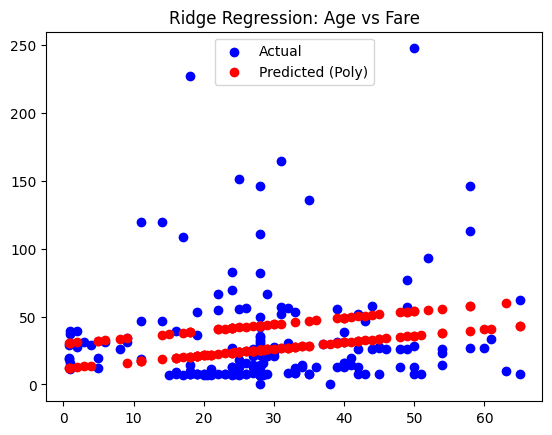

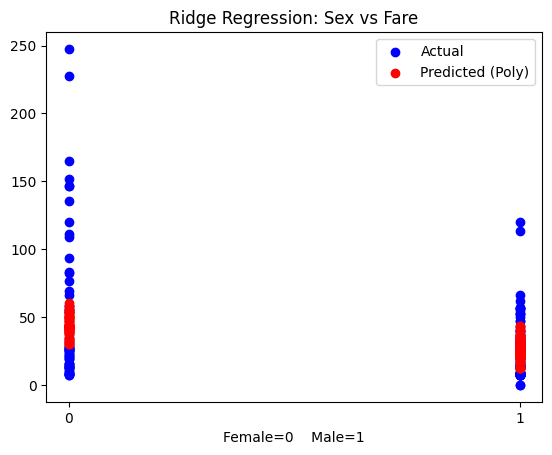

In [83]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X4_train, y4_train)
y4_pred_ridge = ridge_model.predict(X4_test)

# Create scatterplot for Ridge regssion Age vs Fare
plt.scatter(X4_test['age'], y4_test, color='blue', label='Actual')
plt.scatter(X4_test['age'], y4_pred_ridge, color='red', label='Predicted (Poly)')
plt.legend()
plt.title("Ridge Regression: Age vs Fare")
plt.show()

# Create scatterplot for Ridge regssion Sex vs Fare
plt.scatter(X4_test['sex_encoded'], y4_test, color='blue', label='Actual')
plt.scatter(X4_test['sex_encoded'], y4_pred_ridge, color='red', label='Predicted (Poly)')
plt.legend()
plt.xticks([0,1])
plt.xlabel("Female=0    Male=1")
plt.title("Ridge Regression: Sex vs Fare")
plt.show()

### 5.2: Elastic Net

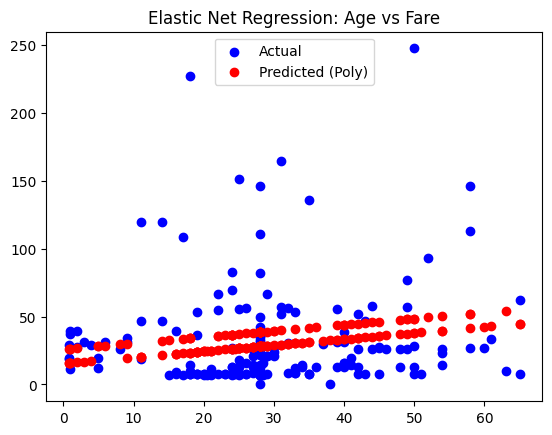

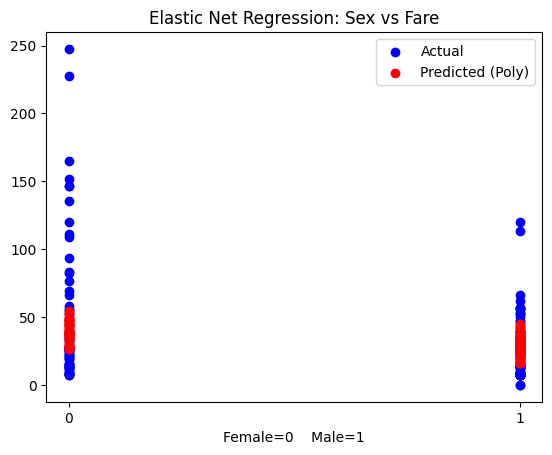

In [84]:
# Create elastic and fit elastic model
elastic_model = ElasticNet(alpha=0.3, l1_ratio=0.5)
elastic_model.fit(X4_train, y4_train)
y4_pred_elastic = elastic_model.predict(X4_test)

# Create scatterplot for Ridge regssion Age vs Fare
plt.scatter(X4_test['age'], y4_test, color='blue', label='Actual')
plt.scatter(X4_test['age'], y4_pred_elastic, color='red', label='Predicted (Poly)')
plt.legend()
plt.title("Elastic Net Regression: Age vs Fare")
plt.show()

# Create scatterplot for Elastic regssion Sex vs Fare
plt.scatter(X4_test['sex_encoded'], y4_test, color='blue', label='Actual')
plt.scatter(X4_test['sex_encoded'], y4_pred_elastic, color='red', label='Predicted (Poly)')
plt.legend()
plt.xticks([0,1])
plt.xlabel("Female=0    Male=1")
plt.title("Elastic Net Regression: Sex vs Fare")
plt.show()

### 5.3: Polynomial Regression


In [85]:
# Set up the poly inputs
poly = PolynomialFeatures(degree=3)
X4_train_poly = poly.fit_transform(X4_train)
X4_test_poly = poly.transform(X4_test)

In [86]:
# Use the poly inputs in the LR model
poly_model = LinearRegression()
poly_model.fit(X4_train_poly, y4_train)
y4_pred_poly = poly_model.predict(X4_test_poly)

### 5.4: Visualize Polynomial Cubic Fit

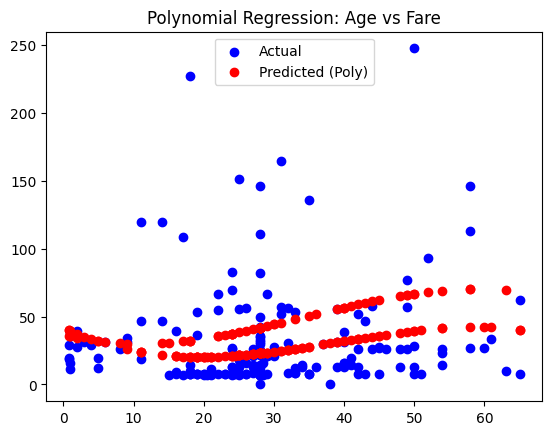

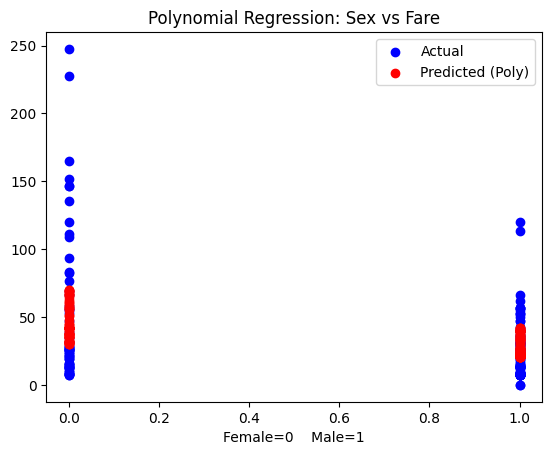

In [87]:
# Create Age vs fare scatter plot
plt.scatter(X4_test['age'], y4_test, color='blue', label='Actual')
plt.scatter(X4_test['age'], y4_pred_poly, color='red', label='Predicted (Poly)')
plt.legend()
plt.title("Polynomial Regression: Age vs Fare")
plt.show()

# Create Sex vs Fare scatter plot
plt.scatter(X4_test['sex_encoded'], y4_test, color='blue', label='Actual')
plt.scatter(X4_test['sex_encoded'], y4_pred_poly, color='red', label='Predicted (Poly)')
plt.legend()
plt.xlabel("Female=0    Male=1")
plt.title("Polynomial Regression: Sex vs Fare")
plt.show()

### 5.4 Reflections

- What patterns does the cubic model seem to capture: It captures in the 20 to 30 range that there is a large number of passengers in that age group and how low their fares are. It then dips back up as the age goes back. 
- Where does it perform well or poorly: It performs well as it detects that there were a large number of passengers in the age group. It also captures a wider spread of fare costs for Female passengers while Male was a tighter spread. 
- Did the polynomial fit outperform linear regression: The linear regression and polynomial fit were incredibly close. Linear regression had the higher R2 at 1.03(only a .01 difference) but the polynomial regression had a higher MAE of 24.20. 
- Where (on the graph or among which kinds of data points) does it fit best: With curved or non-linear patterns. 

### 5.4 Compare All Models
Create a summary table or printout comparing all models

In [88]:
# Create a report function that showcases the predictions score and errors
def report(name, y_true, y_pred):
    print(f"{name} R²: {r2_score(y_true, y_pred):.3f}")
    print(f"{name} RMSE: {root_mean_squared_error(y_true, y_pred):.2f}")
    print(f"{name} MAE: {mean_absolute_error(y_true, y_pred):.2f}\n")

# Report each of the regression models
report("Linear", y4_test, y4_pred_test)
report("Ridge", y4_test, y4_pred_ridge)
report("ElasticNet", y4_test, y4_pred_elastic)
report("Polynomial", y4_test, y4_pred_poly)

Linear R²: 0.103
Linear RMSE: 36.03
Linear MAE: 24.57

Ridge R²: 0.102
Ridge RMSE: 36.04
Ridge MAE: 24.57

ElasticNet R²: 0.074
ElasticNet RMSE: 36.60
ElasticNet MAE: 24.72

Polynomial R²: 0.102
Polynomial RMSE: 36.05
Polynomial MAE: 24.20



### 5.5 Visualize Higher Order Polynomial

In [89]:
# Set up the poly inputs with a higher degree than before
poly = PolynomialFeatures(degree=8)
X4_train_poly2 = poly.fit_transform(X4_train)
X4_test_poly2 = poly.transform(X4_test)

In [90]:
# Use the poly inputs in the LR model
poly_model = LinearRegression()
poly_model.fit(X4_train_poly2, y4_train)
y4_pred_poly2 = poly_model.predict(X4_test_poly2)

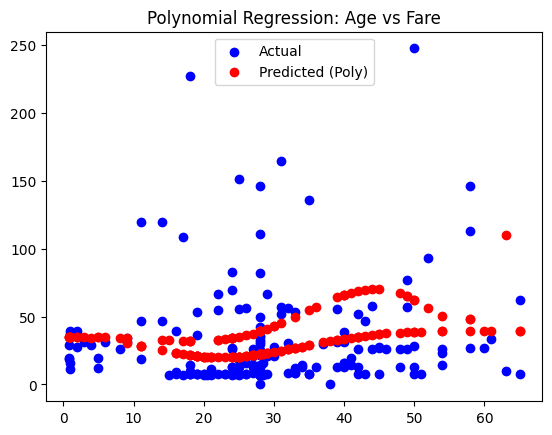

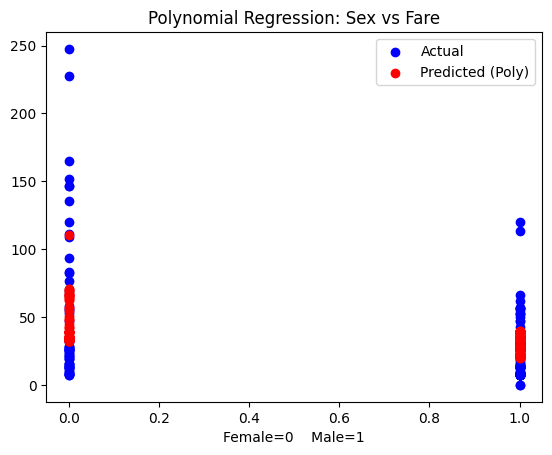

In [91]:
# Create Age vs fare scatter plot
plt.scatter(X4_test['age'], y4_test, color='blue', label='Actual')
plt.scatter(X4_test['age'], y4_pred_poly2, color='red', label='Predicted (Poly)')
plt.legend()
plt.title("Polynomial Regression: Age vs Fare")
plt.show()

# Create Sex vs Fare scatter plot
plt.scatter(X4_test['sex_encoded'], y4_test, color='blue', label='Actual')
plt.scatter(X4_test['sex_encoded'], y4_pred_poly2, color='red', label='Predicted (Poly)')
plt.legend()
plt.xlabel("Female=0    Male=1")
plt.title("Polynomial Regression: Sex vs Fare")
plt.show()

In [92]:
report("Linear", y4_test, y4_pred_test)
report("Ridge", y4_test, y4_pred_ridge)
report("ElasticNet", y4_test, y4_pred_elastic)
report("Polynomial", y4_test, y4_pred_poly2)

Linear R²: 0.103
Linear RMSE: 36.03
Linear MAE: 24.57

Ridge R²: 0.102
Ridge RMSE: 36.04
Ridge MAE: 24.57

ElasticNet R²: 0.074
ElasticNet RMSE: 36.60
ElasticNet MAE: 24.72

Polynomial R²: 0.045
Polynomial RMSE: 37.17
Polynomial MAE: 24.74



### 5.5 Reflection
- With a higher degree of 8, the polynomial performed a lot worse with a greater degree of error than before. 